In [36]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import *

csv = pd.read_csv('Pokemon.csv')
df = pd.DataFrame(csv)

In [5]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
#ordenando pela variável independente

df_sort = df.sort_values(by='Attack')
df_sort.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
488,440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False


In [8]:
p1 = np.polyfit(df_sort['Attack'], df_sort['HP'], 1) 
# 1 é o grau do polinômio, neste caso é um polinômio de 1º grau


In [12]:
# Esta seria a regressão linear, que nada mais é do que uma regressão polinomial de 1º grau

print("{} esta é a constante.".format(p1[0]))
print("{} este é o coeficiente para x".format(p1[1]))
print("Fórmula: y = A + Bx, onde x é o valor do attack que será passado")

0.3322970660048999 esta é a constante.
43.00686641428037 este é o coeficiente para x
Fórmula: y = A + Bx, onde x é o valor do attack que será passado


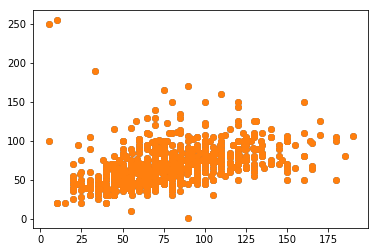

In [14]:
# Como esta a distribuição original

plt.ylabel("HP")
plt.xlabel("Attack")
plt.plot(df_sort['Attack'], df_sort['HP'],'o')
plt.show()

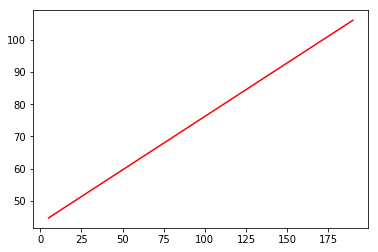

In [16]:
# Modelo com a regressão linear para a predição do valor de HP
plt.plot(df_sort['Attack'], np.polyval(p1,df_sort['Attack']), 'r-')
plt.show()

In [18]:
print("{} este é o valor para Y(HP) caso o X seja 5.".format(np.polyval(p1,5)))
print("Isto no modelo de regressão linear")

44.668351744304864 este é o valor para Y(HP) caso o X seja 5.
Isto no modelo de regressão linear


In [72]:
# MODELO POLINOMIAL

p2 = np.polyfit(df_sort['Attack'], df_sort['HP'], 2) # ao quadrado - calculo dos coeficientes
p3 = np.polyfit(df_sort['Attack'], df_sort['HP'], 3) # ao cubo - calculo dos coeficientes
p4 = np.polyfit(df_sort['Attack'], df_sort['HP'], 10) # de grau 7

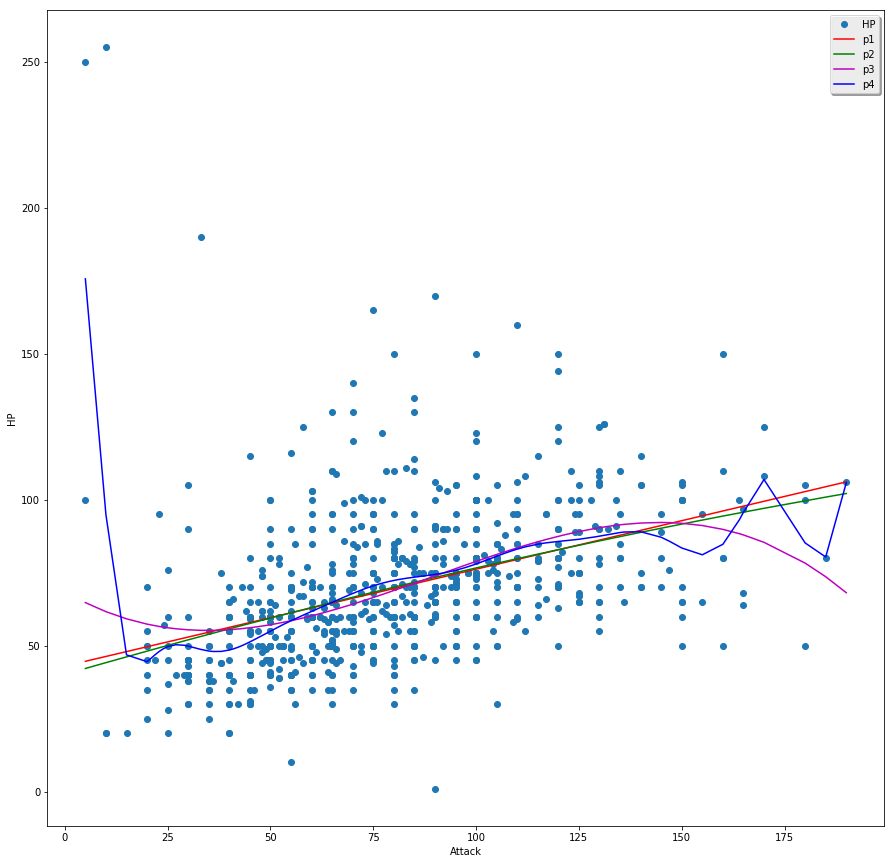

In [32]:
plt.figure(figsize=(15,15))
plt.ylabel("HP")
plt.xlabel("Attack")
plt.plot(df_sort['Attack'], df_sort['HP'],'o')
plt.plot(df_sort['Attack'], np.polyval(p1,df_sort['Attack']), 'r-', label="p1")
plt.plot(df_sort['Attack'], np.polyval(p2,df_sort['Attack']), 'g-', label="p2")
plt.plot(df_sort['Attack'], np.polyval(p3,df_sort['Attack']), 'm-', label="p3")
plt.plot(df_sort['Attack'], np.polyval(p4,df_sort['Attack']), 'b', label="p4")
plt.legend(shadow=True, loc="best")
plt.show()

In [73]:
print("{} este é o valor para Y(HP) caso o X seja 49.".format(np.polyval(p4,49)))
print("Isto no modelo de regressão polinomial")

53.825524244708106 este é o valor para Y(HP) caso o X seja 49.
Isto no modelo de regressão polinomial


In [95]:
linregress(df_sort['Attack'], df_sort['HP']) 
# outro modelo para fazer a regressão linear, os valores bateram com outro modelo
#linregress(x, y)

LinregressResult(slope=0.332297066004901, intercept=43.006866414280324, rvalue=0.42238602877622317, pvalue=5.8889743583114742e-36, stderr=0.025243123961179944)

In [91]:
p1 # primeiro modelo

array([  0.33229707,  43.00686641])

In [107]:
print(ttest_ind(np.polyval(p1,df_sort['Attack']),df_sort['HP']))
print(ttest_ind(np.polyval(p2,df_sort['Attack']),df_sort['HP']))
print(ttest_ind(np.polyval(p3,df_sort['Attack']),df_sort['HP']))

# Fazendo o teste T para verficar qual modelo se aproxima mais

Ttest_indResult(statistic=-4.3501878670194996e-14, pvalue=0.99999999999996536)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)


In [108]:
# neste caso o modelo de 3 ou 2 grau são os que mais se aproximam 
# olhando as médias

print(np.polyval(p1,df_sort['Attack']).mean())
print(np.polyval(p2,df_sort['Attack']).mean())
print(np.polyval(p3,df_sort['Attack']).mean())
print("A média do modelo original de HP é: {}".format(df_sort['HP'].mean()))

69.25875
69.25875
69.25875
A média do modelo original de HP é: 69.25875


69.25875